In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Código de Cartogram

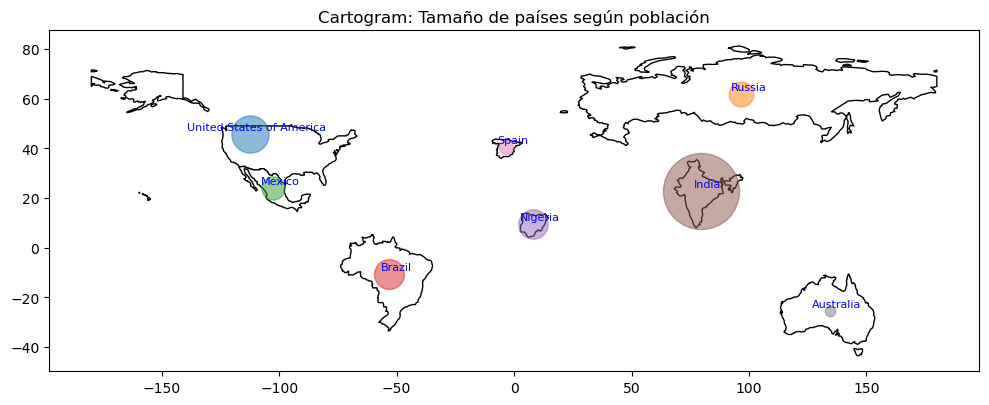

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo shapefile (asegúrate de que esta sea la ruta correcta en tu sistema)
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Datos de población reales aproximados al millón, excluyendo China e incluyendo Australia, México y Nigeria
population_data = pd.DataFrame({
    'ADMIN': ['United States of America', 'India', 'Brazil', 'Russia', 'Spain', 'Australia', 'Mexico', 'Nigeria'],
    'population': [331, 1380, 213, 146, 47, 26, 128, 206]  # en millones
})

# Convertir los datos de población a millones en cifras exactas
population_data['population'] = population_data['population'] * 1_000_000

# Fusionar datos de población con datos geográficos usando la columna 'ADMIN'
world = world.merge(population_data, how='left', on='ADMIN')

# Filtrar solo los países que tienen datos de población
world = world[world['population'].notna()]
world['scaled_area'] = world['population'] / world['population'].max()  # Normalización para escalado

# Dibujar Cartogram
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="white", edgecolor="black")

# Iterar sobre cada país para dibujar el círculo y agregar etiquetas
for idx, row in world.iterrows():
    # Dibujar el círculo proporcional al tamaño de la población
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y,
                s=row.scaled_area * 3000, alpha=0.5)
    
    # Agregar una etiqueta para el nombre del país
    ax.annotate(row['ADMIN'], 
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                xytext=(5, 5),  # Desplazar ligeramente para evitar superposición
                textcoords="offset points",
                ha='center', va='center', fontsize=8, color="blue")

# Ajustar el título
ax.set_title("Cartogram: Tamaño de países según población")

plt.show()


# Código de Flow Map

In [22]:
import folium
from folium.plugins import AntPath

# Crear mapa centrado en Europa
flow_map = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# Datos de ejemplo: flujos entre ciudades
flow_data = [
    {"origin": [51.5074, -0.1278], "destination": [48.8566, 2.3522], "weight": 5},  # London - Paris
    {"origin": [48.8566, 2.3522], "destination": [41.9028, 12.4964], "weight": 3},  # Paris - Rome
    {"origin": [41.9028, 12.4964], "destination": [52.5200, 13.4050], "weight": 4},  # Rome - Berlin
]

# Añadir líneas de flujo
for flow in flow_data:
    AntPath(
        locations=[flow["origin"], flow["destination"]],
        color='blue', weight=flow["weight"], opacity=0.6
    ).add_to(flow_map)

# Mostrar mapa interactivo
flow_map.save("flow_map.html")
flow_map


# Código de Bullet Graph

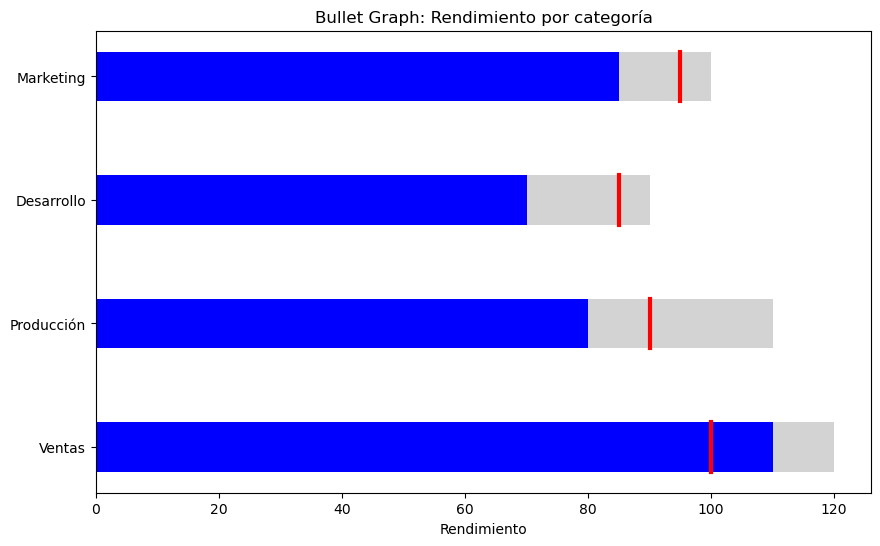

In [23]:
import matplotlib.pyplot as plt

# Datos de ejemplo
categories = ['Ventas', 'Producción', 'Desarrollo', 'Marketing']
targets = [100, 90, 85, 95]
actuals = [110, 80, 70, 85]
limits = [120, 110, 90, 100]

# Crear Bullet Graph
fig, ax = plt.subplots(figsize=(10, 6))
for i, category in enumerate(categories):
    # Fondo gris para representar el límite superior
    ax.barh(i, limits[i], color='lightgray', height=0.4)
    # Barras principales que muestran el rendimiento real
    ax.barh(i, actuals[i], color='blue', height=0.4)
    # Líneas de objetivo
    ax.plot([targets[i], targets[i]], [i-0.2, i+0.2], color='red', linewidth=3)

ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.set_xlabel("Rendimiento")
ax.set_title("Bullet Graph: Rendimiento por categoría")
plt.show()
